Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        63
           1       1.00      0.96      0.98        27

    accuracy                           0.99        90
   macro avg       0.99      0.98      0.99        90
weighted avg       0.99      0.99      0.99        90



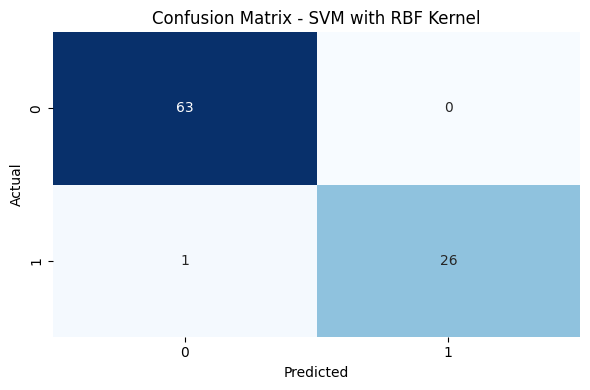

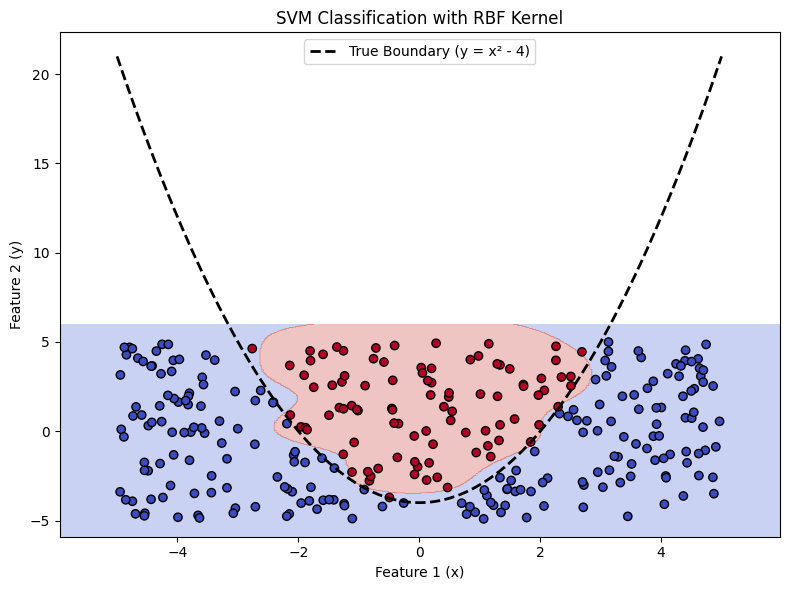

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

np.random.seed(42)

X = np.random.uniform(-5, 5, (300, 2))
y = (X[:, 1] > (X[:, 0]**2 - 4)).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='rbf', gamma='auto', C=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM with RBF Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

x_curve = np.linspace(-5, 5, 500)
y_curve = x_curve**2 - 4
plt.plot(x_curve, y_curve, 'k--', linewidth=2, label="True Boundary (y = x² - 4)")

plt.title("SVM Classification with RBF Kernel")
plt.xlabel("Feature 1 (x)")
plt.ylabel("Feature 2 (y)")
plt.legend()
plt.tight_layout()
plt.show()
